# Data 전처리(Data Preprocessing)란

-   데이터 분석, 머신러닝 모델링 전에 수행하는 작업이다.
-   데이터 분석이나 머신러닝 모델에 적합한 형태로 데이터셋을 변환 또는 조정하는 과정을 말한다.
-   Garbage in, Garbage out.
    -   좋은 dataset으로 학습 해야 좋은 예측 결과를 만드는 모델을 학습할 수 있다.
    -   좋은 train dataset을 만드는 것은 모델의 성능에 가장 큰 영향을 준다.
-   Data 전처리에는 다음과 같은 작업이 있다.
    -   **Data Cleaning (데이터 정제)**
        -   데이터셋에 있는 오류값, 불필요한 값, 결측치, 중복값 등을 제거하는 작업
    -   컬럼 선택 및 파생변수 생성
        -   컬럼들 중 분석에 필요한 컬럼들만 선택하거나 기존 컬럼들을 계산한 결과값을 가지는 파생변수를 생성한다.
    -   Feature의 데이터 타입 변환
        -   문자열을 날짜 타입으로 변환, 범주형을 수치형으로 변환등과 같이 원래 데이터의 형식에 맞게 변환하는 작업.
    -   수치형 데이터 Feature Scaling
        -   수치형 컬럼들의 scale(척도) 를 맞춰 주는 작업.
    -   범주형 데이터 인코딩
        -   문자열 형태로 되어있는 범주형 데이터를 숫자 형태로 변경하는 작업.

# 결측치(Missing Value) 처리

-   결측치(Missing Value)
    -   수집하지 못한 값. 모르는 값. 없는 값
    -   결측치 값은 `NA, NaN, None, null` 로 표현한다. (언어마다 차이가 있다.)
-   결측치는 데이터 분석이나 머신러닝 모델링 전의 데이터 전처리 과정에서 처리해줘야 한다.

### 결측치 처리 방법

결측치를 처리하기 전에 **"이 값이 기록되지 않아서 누락된 것인가, 아니면 존재하지 않아서 누락된 것인가?"** 를 확인해야 한다.  
존재하지 않아서 누락된 값이라면 이것은 어떤 값일까 추측할 필요 없이 결측치로 유지하면 되지만  
값이 기록되지 않아서(수집하지 못해서) 누락된 경우는 해당 열과 행의 다른 값을 기반으로 값이 무엇이었을지 추측해 볼 수 있다


1. #### 결측치 삭제(Complete Case Analysis):

-   리스트와이즈 삭제(Listwise Deletion)
    -   결측치가 있는 행들을 삭제한다.
    -   수집한 데이터도 같이 삭제되는 단점이 있다.
    -   데이터가 충분히 크고 결측치가 많지 않을 때 적합하다.
-   컬럼 삭제 (Drop column)
    -   컬럼자체에 결측차가 너무 많을 경우 컬럼을 제거할 수도 있다.
-   페어와이즈 삭제(Pairwise deletion)
    -   분석에 필요한 특정 컬럼들에 대해서만 결측치를 제거하고 분석한다.
    -   전체 데이터셋에서 결측치를 제거하지 않기 때문에 데이터 손실을 최소화 하는 장점이 있다.
    -   모든 분석에 사용될 수 없고 상관관계 분석 처럼 컬럼들간의 관계등을 분석하는 경우 유용할 수있다.
    -   선택된 컬럼마다 결측치의 개수와 결측치의 위치(다 다른 행에 결측치가 있으므로)가 다르므로 일관성 있는 분석이 안된다.
    -   머신러닝 학습에는 사용할 수없다.


#### 2. 결측치 대체(imputation)

결측치가 수집하지 못해 누락된 경우 그 값일 가능성이 가장 높은 값으로 대체할 수 있다.  
대체할 값으로 일정한 값을 사용하는 경우와 분석을 통해 찾는 방법이 있다.

-   **평균/중앙값/최빈값 대체**
    -   수치형 변수의 경우 평균이나 중앙값으로, 범주형 변수의 경우 최빈값으로 결측치를 대체한다.
    -   **평균으로 대체** - 수치형 컬럼으로 outlier(극단치)의 영향을 받지 않는 모델이거나 컬럼의 데이터들이 **정규 분포를 따르거나 outlier(극단치)가 없는 경우** 적합.
    -   **중앙값으로 대체**
        -   수치형 컬럼으로 outlier(극단치)가 존재하거나 데이터 분포가 비대칭인 컬럼의 결측치 대체에 적합.
        -   보통 평균보다 중앙값을 사용한다.
    -   **최빈값으로 대체**
        -   범주형 컬럼의 경우 대푯값인 최빈값으로 대체한다.
    -   **K-최근접 이웃(K-NN) 대체**
        -   결측치가 있는 데이터 포인트와 가장 가까운 K개의 데이터 포인트를 찾아, 그 값들의 평균(수치형 데이터)이나 최빈값(범주형 데이터)으로 결측치를 대체한다.
-   **모델링 기반 대체**
    -   결측치가 있는 컬럼을 output(종속변수)으로 결측치가 없는 행들(독립변수)을 input으로 하여 결측치를 예측하는 모델을 정의한다.
-   **결측치를 표현하는 값으로 대체**
    -   예를 들어 나이컬럼의 nan을 -1, 혈액형의 nan을 "없음" 등과 같이 그 컬럼이 가질 수없는 값을 nan 대신 사용한다.
-   #### 다중 대체 (multiple imputation)
    -   여러 방식으로 결측치를 대체한 데이터셋을 만든다. 각 데이터셋마다 분석하고 추론한 뒤 그 결과들을 합쳐서 최종 결론을 낸다.


# 이상치(Outlier) 처리

-   데이터 집합에서 다른 관측치들과 크게 다른 값을 가지는 데이터 포인트를 말한다.
    -   잘못된 값이나 극단치가 있다.
-   이상치가 생기는 원인은 데이터 수집과정에서의 문제, 측정 오류, 극단적 변이가 반영된 값(엄청 튀는 값)이 수집된 경우 등이 있다.
-   이상치는 이상치들은 일반적인 경향에서 벗어난 값이므로 **정확하게 식별하고 처리하는 것이 분석의 정확성과 신뢰성을 높이는데 중요하다.**


## 분포에서 벗어난 이상치(Outlier) 식별

-   통계적 기준과 도메인 기준이 있다.

### 통계적 기준

-   **표준편차 기준**
    -   데이터가 **정규분포**를 따른다고 가정할 때 평균으로 부터 _k_ 표준편차 범위 밖으로 떨어진 데이터 포인트를 outlier 로 판단한다.

\begin{align}
&정상범위\,값: \mu - k \times \sigma \ \leq value \leq \mu + k \times \sigma \\
&\mu: 평균,\, \sigma: 표준편차
\end{align}

-   **분위수 기준**
    -   IQR(Inter quantile Range) 을 이용해 Outlier 여부를 찾는다.
    -   1분위, 3분위 에서 IQR \* 1.5 보다 더 떨어진 값을 outlier로 판단한다. 단 정상 범위를 조정하려고 할때는 1.5값을 변경할 수 있다.

\begin{align}
&IQR = 3분위 - 1분위 \\
&정상범위\,값: 1.5\times (1분위 - IQR) \leq value \leq 1.5\times (3분위 + IQR)
\end{align}

-   **극단치(분포에서 벗어난 값)**
    -   정상적이 값이지만 다른 값들과 다른 패턴을 가지는 값.
    -   일반적으로 극단적으로 크거나 작은 값
    -   처리
        1. 제거한다.
            - 결측치로 대체 하거나 데이터 포인트(행)를 제거한다.
            - outlier가 분석 결과에 부정적 영항을 미치는 경우.
            - outlier값이 대상 집단을 대표하지 않는다고 판단할 경우 .
            - 명확히 잘못수집 된 오류값일 경우
        1. 윈저화 (Winsorization)
            - 최소값과 최값을 정해 놓고 그 범위를 넘어서는 작은 값은 최소값으로 범위를 넘어서 큰 값은 최대값으로 대체한다.
        1. 대체 (Imputation)
            - 평균, 중앙값, 최빈값 등으로 대체한다.


# Feature 타입 별 전처리

## Feature(변수)의 타입

-   **범주형(Categorical) 변수**
    -   범주를 구분하는 이름을 가지는 변수.
        -   **범주(範疇)** 의미: 동일한 성질을 가진 부류나 범위
        -   각 값 사이에 값이 없는 이산적 특징을 가진다.
        -   값이 될 수있는 값들이 정해져 있다.
    -   **명목(Norminal) 변수/비서열(Unordered) 변수**
        -   범주에 속한 값간에 서열(순위)가 없는 변수
        -   성별, 혈액형, 지역
    -   **순위(Ordinal) 변수/서열(Ordered) 변수**
        -   범주에 속한 값 간에 서열(순위)가 있는 변수
        -   성적, 직급, 만족도
-   **수치형(Numeric) 변수**
    -   수량을 표현하는 값들을 가지는 변수.
    -   **이산형(Discrete) 변수**
        -   수치를 표현하지만 소수점의 형태로 표현되지 못하는 데이터. 정수형 값들을 가진다.
        -   예) 하루 방문 고객수, 가격(원화), 물건의 개수
    -   **연속형(Continuous) 변수**
        -   수치를 표현하며 소수점으로 표현가능한 데이터. 실수형 값들을 가진다.
        -   예) 키, 몸무게, 시간

> -   실수형 데이터로 구성된 Feature는 수치형 값이다.
> -   문자열 데이터로 구성된 Feature는 단순 문자열값이거나 범주형 값이다.
> -   정수형 데이터로 구성된 Feature는 범주형이거나 연속형 값이다.
>     -   몇개의 고유값으로 구성되었는지를 봐야 한다. 또는 평균의 의미롤 확인해 본다. 평균이 그 feature를 표현하는 값이면 수치형 아니면 범주형.


# 범주형 데이터 전처리

-   Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 숫자(정수/실수)인 것만 처리할 수 있다.
-   문자열(str)일 경우 숫자 형으로 변환해야 한다.
    -   **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    -   범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다.
  
## 범주형 Feature의 처리

-   Label Encoding
-   One-Hot Encoding


## 레이블 인코딩(Label encoding)

-   범주형 Feature의 고유값들 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
-   **숫자의 크기의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
-   **숫자의 크기의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

-   **sklearn.preprocessing.LabelEncoder** 사용
    -   fit(): 어떻게 변환할 지 학습
    -   transform(): 문자열를 숫자로 변환
    -   fit_transform(): 학습과 변환을 한번에 처리
    -   inverse_transform():숫자를 문자열로 변환
    -   classes\_ : 인코딩한 클래스 조회

### adult data 에 label encoding 적용

-   Adult 데이터셋은 1994년 인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋.
-   target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.

In [1]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [2]:
import pandas as pd
adult_df = pd.read_csv(
    "data/adult.data",
    header = None,
    names = cols,
    skipinitialspace = True,
    na_values = "?"
)
adult_df.shape

(32561, 15)

In [3]:
adult_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
# 결측치 제거
adult_df.dropna(inplace=True)
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
adult_df.shape

(30162, 15)

### adult dataset - 레이블 인코딩 처리

-   범주형: 'workclass','education', 'marital-status', 'occupation','relationship', 'race', 'gender','native-country', 'income'
-   연속형: 'age', fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'

**encoding_columns 컬럼들은 Label Encoding 처리,**  
**not_encoding_columns 컬럼들의 값들은 그대로 유지.**

encoding_columns의 값들은 LabelEncoding 된 값으로 not_encoding_columns의 값들은 원래값 그대로 구성된 DataFrame을 생성해서 반환한다.

> 주의: LabelEncoding은 Feature(컬럼) 별로 처리해야 한다. 한번에 여러컬럼을 하나의 LabelEncoder로 처리할 수 없다.

In [7]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

In [8]:
df = adult_df.copy()

In [9]:
# encoding_columns들을 label encoding
## scikit learn의 LabelEncoder는 컬럼 단위로 처리

from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col  in encoding_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le # 변환 과정에서 사용한 LabelEncoder 인스턴스인 le를 le_dict 딕셔너리에 col을 키(key)로 하여 저장

In [10]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Adult dataset의 income 추론 모델링

### 데이터 분할

-   X, y 나누기
-   train/validation/test set 나누기


In [12]:
y = df['income'].values
X = df.drop(columns="income").values
y.shape, X.shape

((30162,), (30162, 14))

In [ ]:
# hold out 방식으로 데이터셋을 나누기.
# 1차: 75% 학습 및 검증, 25% 테스트
# 2차: 75% 학습, 25% 검증
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, stratify=y_tmp, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((16965, 14), (5656, 14), (7541, 14))

### 모델생성, 학습

-   DecisionTreeClassifier
-   train set 이용해 학습

### 검증

-   평가지표: 정확도(accuracy)
-   train set/validation set 에 대해서 모델 검증

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##### 모델링
max_depth_list = [3, 4, 5, 6, 7, 8, 9, 10, 11,12]
train_acc_list = []
val_acc_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    # 검증
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    train_acc = accuracy_score(y_train, pred_train)
    val_acc = accuracy_score(y_val, pred_val)
    print(f"max_depth: {max_depth} validation 정확도: {val_acc}")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

max_depth: 3 validation 정확도: 0.8306223479490806
max_depth: 4 validation 정확도: 0.8373408769448374
max_depth: 5 validation 정확도: 0.8408769448373409
max_depth: 6 validation 정확도: 0.8373408769448374
max_depth: 7 validation 정확도: 0.844059405940594
max_depth: 8 validation 정확도: 0.8460042432814711
max_depth: 9 validation 정확도: 0.8481258840169731
max_depth: 10 validation 정확도: 0.8451202263083452
max_depth: 11 validation 정확도: 0.8468882602545968
max_depth: 12 validation 정확도: 0.8474186704384724


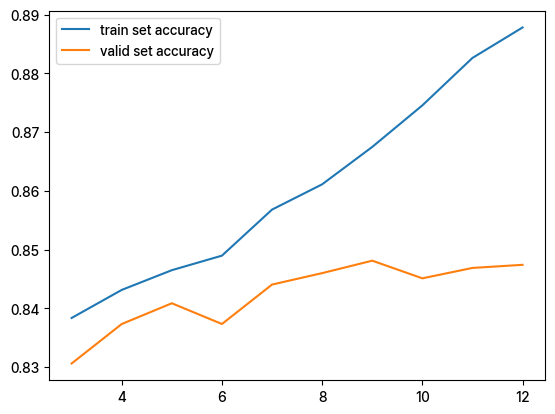

In [15]:
import matplotlib.pyplot as plt
plt.plot(max_depth_list, train_acc_list, label="train set accuracy")
plt.plot(max_depth_list, val_acc_list, label="valid set accuracy")
plt.legend()
plt.show()

### 최종평가

-   test set으로 최종평가

In [16]:
best_model = DecisionTreeClassifier(max_depth=9,random_state=0)
best_model.fit(X_train, y_train)
pred_test = best_model.predict(X_test)
acc_score = accuracy_score(y_test, pred_test)
print("최종 정확도 평가결과:", acc_score)

최종 정확도 평가결과: 0.8380851345975335


In [17]:
## 새로운 데이터를 모델을 이용해 추론.
new_X = X_test[10:20]
pred = best_model.predict(new_X)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [18]:
le_dict['income'].classes_[pred]

array(['<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '>50K', '<=50K'], dtype=object)

## 원핫 인코딩(One-Hot encoding)

-   N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    -   고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
-   **숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
-   **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**

### One-Hot Encoding 변환 처리

-   **sklearn.preprocessing.OneHotEncoder**
    -   fit(데이터셋): 데이터셋을 기준으로 어떻게 변환할 지 학습
    -   transform(데이터셋): Argument로 받은 데이터셋을 원핫인코딩 처리
    -   fit_transform(데이터셋): 학습과 변환을 한번에 처리
    -   get_feature_names_out() : 원핫인코딩으로 변환된 Feature(컬럼)들의 이름을 반환
    -   **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
        -   DataFrame도 가능
        -   원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.

> OneHotEncoder객체 생성시 sparse 매개변수의 값을 False로 설정하지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.  
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.  
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.

### adult dataset - one-hot encoding 적용

-   **전체 Feature 중 'age', 'workclass','education', 'occupation', 'gender', 'hours-per-week', 'income' 만 사용.**
-   범주형 Feature중 **income은 출력 데이터이므로 Label Encoding 처리**를 한 뒤 y로 뺀다.
-   나머지 범주형Feature들은 One-hot encoding 처리한다.
    -   'workclass','education', 'occupation', 'gender'


In [19]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
use_cols = ['age', 'workclass','education', 'occupation', 'gender', 'hours-per-week', 'income']

In [20]:
df2 = adult_df[use_cols].reset_index(drop=True)
df2

,age,workclass,education,occupation,gender,hours-per-week,income
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K
...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Tech-support,Female,38,<=50K
30158,40,Private,HS-grad,Machine-op-inspct,Male,40,>50K
30159,58,Private,HS-grad,Adm-clerical,Female,40,<=50K
30160,22,Private,HS-grad,Adm-clerical,Male,20,<=50K


##### 필요한 Feature들만 추출

In [21]:
category_colnames = ['workclass','education', 'occupation', 'gender']
continuous_colnames = ['age', 'hours-per-week']
target = 'income'

In [22]:
# X, y (target-income)를 분리
# y는 LabelEncoding

target_value = df2[target]
data = df2.drop(columns=target)

In [23]:
y_le = LabelEncoder()
y2 = y_le.fit_transform(target_value)
y2

array([0, 0, 0, ..., 0, 0, 1], shape=(30162,))

#### one hot encoding 처리

In [24]:
# category_colnames 컬럼들을 원핫인코딩'
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
category_ohe = ohe.fit_transform(data[category_colnames])
category_ohe.shape

(30162, 39)

In [25]:
ohe.get_feature_names_out()

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
   

In [27]:
### category_ohe => 범주형 컬럼들의 값만 변환한 결과
##### category_ohe + 수치형(연속형) 컬럼들을 붙여준다.
# DF + DF(합치기) -> pd.concat()
# ndarray + ndarray (합치기) -> np.concatenate()
import numpy as np
X2 = np.concatenate([category_ohe.toarray(), data[continuous_colnames].values],axis=1)
X2.shape

(30162, 41)

In [28]:
X2.shape, y2.shape

((30162, 41), (30162,))

### 모델 학습
##### train, validation, test set 나누기


In [29]:
from sklearn.model_selection import train_test_split
# testset 분리
X_tmp2, X_test2, y_tmp2, y_test2 = train_test_split(X2, y2, stratify=y2, test_size=0.25, random_state=0)
# train, valid set 분리
X_train2, X_val2, y_train2, y_val2  = train_test_split(X_tmp2, y_tmp2, stratify=y_tmp2, test_size=0.25, random_state=0)

X_train2.shape, X_val2.shape, X_test2.shape

((16965, 41), (5656, 41), (7541, 41))

##### 모델생성

-   DecisionTreeClassifier 사용

In [30]:
### 모델링.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_list2 = range(3, 11)
train_acc_list2 = []
val_acc_list2 = []
for max_depth2 in max_depth_list2:
    model2 = DecisionTreeClassifier(max_depth=max_depth2, random_state=0)
    model2.fit(X_train2, y_train2)

    pred_train2 = model2.predict(X_train2)
    pred_val2 = model2.predict(X_val2)

    train_acc2 = accuracy_score(y_train2, pred_train2)
    val_acc2 = accuracy_score(y_val2, pred_val2)
    print(f"max_depth: {max_depth2} val 정확도: {val_acc2}")
    train_acc_list2.append(train_acc2)
    val_acc_list2.append(val_acc2)

max_depth: 3 val 정확도: 0.7715700141442716
max_depth: 4 val 정확도: 0.7865983026874116
max_depth: 5 val 정확도: 0.7874823196605375
max_depth: 6 val 정확도: 0.7904879773691655
max_depth: 7 val 정확도: 0.7966760961810466
max_depth: 8 val 정확도: 0.7942008486562943
max_depth: 9 val 정확도: 0.7943776520509194
max_depth: 10 val 정확도: 0.7841230551626591


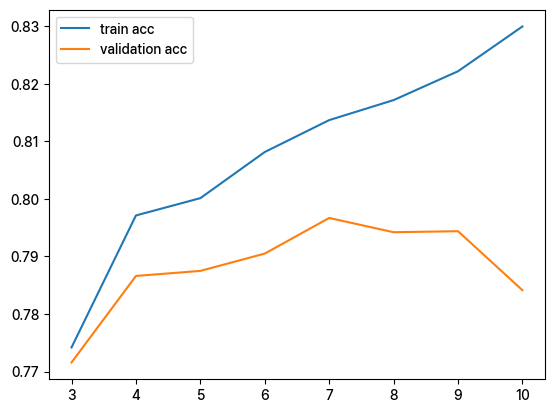

In [31]:
import matplotlib.pyplot as plt

plt.plot(max_depth_list2, train_acc_list2, label="train acc")
plt.plot(max_depth_list2, val_acc_list2, label="validation acc")
plt.legend()
plt.show()

##### 최종평가

In [33]:
best_model2 = DecisionTreeClassifier(max_depth=7, random_state=0)
best_model2.fit(X_train2,y_train2)
pred_test2 = best_model2.predict(X_test2)
acc_score2 = accuracy_score(y_test, pred_test2)
print("Test set 최종 정확도 평가:", acc_score2)

Test set 최종 정확도 평가: 0.8055960747911417


# 수치형 데이터 전처리

-   연속형 데이터는 변수가 가지는 값들이 연속된 값인 경우로 보통 정해진 범위 안의 모든 실수가 값이 될 수 있다.

## Feature Scaling(정규화-Normalization)

-   각 피처들간의 값의 범위(척도-Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
-   트리계열을 제외한 대부분의 머신러닝 알고리즘들이 Feature간의 서로 다른 척도(Scale)에 영향을 받는다.
    -   선형모델, SVM 모델, 신경망 모델
-   **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**
    -   Train Set으로 학습한 scaler를 이용해 Train/Validation/Test set들을 변환한다.

### 종류

-   표준화(Standardization) Scaling
    -   StandardScaler 사용
-   Min Max Scaling
    -   MinMaxScaler 사용

### 메소드

-   fit(): 어떻게 변환할 지 학습
    -   2차원 배열을 받으면 0축을 기준으로 학습한다. (DataFrame으로는 컬럼기준)
-   transform(): 변환
    -   2차원 배열을 받으며 0축을 기준으로 변환한다. (DataFrame으로는 컬럼기준)
-   fit_transform(): 학습과 변환을 한번에 처리
-   inverse_transform(): 변환된 값을 원래값으로 복원

## 표준화(StandardScaler)

-   피쳐의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환한다.
    -   0을 기준으로 모든 데이터들이 모여있게 된다

$$
New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
\mu-평균,\;  \sigma-표준편차
$$

-   **sklearn.preprocessing.StandardScaler** 를 이용

## 전처리시 주의할 점 (특히 Feature scaling 시)

-   전처리는 Train set을 학습시킨 전처리기로 train, validation, test set을 변환시킨다.
-   이유: 앞으로 모델이 예측할 새로운 데이터셋에 대한 정확한 평가를 위해서.


## MinMaxScaler

-   데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다.
    $$
    New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
    $$

### 위스콘신 유방암 데이터셋

-   위스콘신 대학교에서 제공한 유방암 진단결과 데이터
-   Feature: 종양 측정값들
    -   모든 Feature들은 **연속형(continous)** 이다.
-   target: 악성, 양성 여부
-   scikit-learn에서 toy dataset으로 제공한다.
    -   load_breast_cancer() 함수 이용

In [34]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

In [38]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
import pandas as pd
import numpy as np
# DataFrame으로 데이터 확인
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = np.where(y==0,dataset.target_names[0], dataset.target_names[1])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


##### train/validation/test set으로 데이터 나누기
- 전처리는 train set을 기준으로 trainset/testset/validation set의 데이터들을 변환.
    - 전처리기 학습은 train set으로 한다.

In [41]:
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tmp,y_tmp, test_size=0.2, stratify=y_tmp,random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

### 전처리

##### 표준화(StandardScaling)


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 객체 생성
sc1 = StandardScaler()
# fitting - 수치형 features 들을 변환
sc1.fit(X_train) # train_set으로 학습
## 변환
X_train_sc1 = sc1.transform(X_train)    # train set 변환
X_val_sc1 = sc1.transform(X_val)        # validation set 변환
X_test_sc1 = sc1.transform(X_test)      # test set 변환.

##### 확인

-   평균, 표준편차 확인

In [43]:
X_train_sc1.mean(axis=0)

array([-2.57349087e-15, -1.32921757e-15, -6.43105837e-16,  2.44310067e-16,
       -8.97938622e-16,  4.88620133e-16,  4.11148527e-16, -5.05395481e-16,
       -1.67997484e-15,  2.69198583e-15, -3.18807862e-16,  8.82688306e-16,
       -4.05810916e-16,  6.43563347e-16,  7.83179992e-16, -3.52434809e-16,
        5.37573649e-16, -8.97824245e-16, -1.95623432e-15,  1.57078258e-16,
       -2.40116230e-16, -7.12189770e-17, -1.59483995e-15,  1.17412185e-15,
        5.79512018e-15,  1.85504847e-15,  2.56205313e-17, -3.49232243e-16,
        5.84392120e-16, -1.46769044e-15])

In [45]:
X_train_sc1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [46]:
X_test_sc1.mean(axis=0)

array([-0.02755451,  0.08462339, -0.02558239, -0.04735788, -0.03309878,
        0.0199306 ,  0.04675048, -0.02365148,  0.04530622,  0.0629339 ,
        0.02884174,  0.02607431, -0.00372309, -0.02113176, -0.04401728,
        0.04237617,  0.13306188, -0.00117358,  0.00600558,  0.1279736 ,
       -0.01388783,  0.06839493, -0.02027369, -0.03423181, -0.00644577,
       -0.001337  ,  0.04174787, -0.02712696,  0.02481148,  0.00464659])

In [47]:
X_test_sc1.std(axis=0)

array([0.88433744, 0.95827143, 0.88627684, 0.83094529, 1.04597474,
       1.04610933, 1.14094474, 0.96973869, 1.05451593, 1.05316398,
       0.91982235, 0.88073149, 0.86254023, 0.80623181, 0.88080149,
       1.16601392, 1.56666028, 1.10542899, 0.92873118, 1.63861554,
       0.90372594, 0.95059555, 0.89584693, 0.84229665, 1.00673109,
       1.02452928, 1.08144878, 0.91045547, 1.04668334, 1.06908734])

##### MinMax Scaling

-   각 dataset별로 변환된 것을 다음의 변수에 대입
    -   X_train_scaled2, X_val_scaled2, X_test_scaled2

In [51]:
sc2 = MinMaxScaler()
# trainset으로 학습 
sc2.fit(X_train)
# 변환
X_train_sc2 = sc2.transform(X_train)
X_val_sc2 = sc2.transform(X_val)
X_test_sc2 = sc2.transform(X_test)

##### 확인

-   min, max값 확인

In [52]:
import pandas as pd
pd.DataFrame(X_train).agg(['min','max'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,7.691,9.71,47.92,170.4,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,8.678,12.02,54.49,223.6,0.07117,0.02729,0.000,0.0000,0.1565,0.05504
max,27.420,33.81,186.90,2501.0,0.14250,0.34540,0.3754,0.1913,0.304,0.09744,...,36.040,49.54,251.20,4254.0,0.22260,0.93790,1.252,0.2903,0.6638,0.17300


In [53]:
pd.DataFrame(X_train_sc2).agg(['min','max'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [54]:
pd.DataFrame(X_test_sc2).agg(['min','max'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,-0.035988,0.102075,-0.029717,-0.011542,0.150217,0.021839,0.000000,0.000000,0.054040,0.006108,...,-0.027337,0.074627,-0.020741,-0.009528,0.090273,0.017549,0.000000,0.000000,0.048492,0.001441
max,0.839323,0.944398,0.851058,0.682485,1.232558,0.819950,1.136921,1.051751,0.817172,0.949031,...,0.720781,0.889925,0.774287,0.559101,0.786040,1.131890,0.882588,1.002411,0.829687,1.292472


In [55]:
pd.DataFrame(X_val_sc2).agg(['min','max'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
min,0.044604,0.065145,0.047561,0.021840,0.180260,0.057512,0.000000,0.000000,0.142424,0.012216,...,0.029055,0.058102,0.044787,0.012902,0.137753,0.041873,0.00000,0.000000,0.016361,0.001780
max,1.034974,1.226971,1.011512,0.999142,0.899855,0.790197,0.936068,0.833769,0.850000,0.964406,...,0.806666,0.875533,0.737177,0.724345,0.854718,0.923348,0.74976,0.912849,0.554504,0.689725


### Modeling

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### scaling하지 않은 데이터셋 이용

In [57]:
# 하이퍼파라미터 C, gamma
# svm = SVC(C=0.1, gamma=0.1, random_state=0)
svm = SVC(random_state=0)
# 학습
svm.fit(X_train, y_train)
# 검증/평가
print("Train set: ", accuracy_score(y_train, svm.predict(X_train)))
print("Valid set:", accuracy_score(y_val, svm.predict(X_val)))
print("Test set:", accuracy_score(y_test, svm.predict(X_test)))

Train set:  0.9203296703296703
Valid set: 0.9120879120879121
Test set: 0.9122807017543859


##### standardscaler 데이터셋 이용

In [59]:
# 하이퍼파라미터 C, gamma
# svm = SVC(C=0.1, gamma=0.1, random_state=0)
svm1 = SVC(random_state=0)
# 학습
svm1.fit(X_train_sc1, y_train)
# 검증/평가
print("Train set: ", accuracy_score(y_train, svm1.predict(X_train_sc1)))
print("Valid set:", accuracy_score(y_val, svm1.predict(X_val_sc1)))
print("Test set:", accuracy_score(y_test, svm1.predict(X_test_sc1)))

Train set:  0.9917582417582418
Valid set: 0.989010989010989
Test set: 0.9473684210526315


##### MinMax Scaling 데이터셋 이용


In [ ]:
# 하이퍼파라미터 C, gamma
# svm = SVC(C=0.1, gamma=0.1, random_state=0)
svm = SVC(random_state=0)
# 학습
svm.fit(X_train_sc2, y_train)
# 검증/평가
print("Train set: ", accuracy_score(y_train, svm.predict(X_train_sc2)))
print("Valid set:", accuracy_score(y_val, svm.predict(X_val_sc2)))
print("Test set:", accuracy_score(y_test, svm.predict(X_test_sc2)))

Train set:  0.9862637362637363
Valid set: 0.989010989010989
Test set: 0.9473684210526315


## 모델 저장 -> pickle

-   전처리 객체, 모델 객체

In [ ]:
import os
import pickle

# os.makedirs('saved_models', exist_ok=True)

In [62]:
# StandardScaler, svm 모델 저장
with open("saved_models/wisconsin_scaler.pkl", "wb") as fw1:
    pickle.dump(sc1, fw1)

with open("saved_models/wisconsin_svm.pkl", "wb") as fw2:
    pickle.dump(svm1, fw2)

In [63]:
# StandardScaler, svm 모델 불러오기
with open("saved_models/wisconsin_scaler.pkl", "rb") as fr1:
    saved_scaler = pickle.load(fr1)

with open("saved_models/wisconsin_svm.pkl", "rb") as fr2:
    saved_model = pickle.load(fr2)

In [65]:
# 전처리
X_test_scaled = saved_scaler.transform(X_test)
pred_test = saved_model.predict(X_test_scaled)
accuracy_score(y_test,pred_test)

0.9473684210526315